In [1]:
cd drive/MyDrive/

/content/drive/MyDrive


In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

**Q.1** **On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.**

In [3]:
data_shop = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [4]:
data_shop.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [5]:
data_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


**Q.1.a.** Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [6]:
data_shop.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**Q.1.a.** Average order value is defined as the the total value by the no. of occurences i.e. in other words mean of the data. Statistical description of above data shows that the Average order value(AOV) of 'order_amount' is approx 3145.13('mean' row of 'order_amount' column: 3145.128 ) which is given in the question in contradiction to low prices of sneakers. 

**Initial hypotheses:**

> 

There is nothing wrong in the calculation of AOV but certain points should be taken care of before actual calculation to get accurate statistical analysis that somehow would have went wrong. The potential reason for this could be data with high outliers and due to their large values mean/AOV could have been shifted to a large number. Lets analyse in detail: 


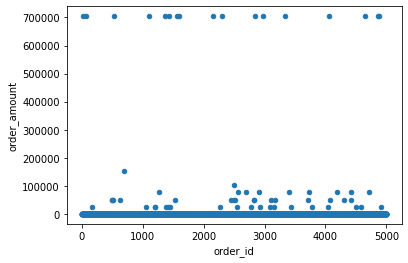

In [7]:
data_shop.plot.scatter(x='order_id',y='order_amount')

**Q.1. a.** Above scatter plot clearly shows that most of the occurences lie within 30000 amount and few outliers are having very high value

(0.0, 15000.0)

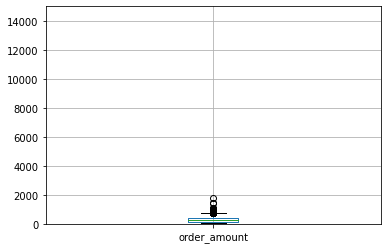

In [8]:
data_shop.boxplot('order_amount')
plt.ylim(0,15000)

**Q.1.a.** After chopping the y-axis to 15000 we found using box plot that third quantile and the maximum value lie within 1000. This confirms our hypotheses of outlier being the reason of AOV shifting to a high value

In [28]:
data_cut = data_shop.groupby(['order_amount']).size().reset_index(name = 'count').sort_values(by='order_amount', ascending = False)
data_cut.head(20)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


**Q.1.a.** By grouping the data on 'order_amount' column and sorting with descending visulaisation we can see that ouliers are upto 25000 and after that amount is dropped to within 2000 occurences are also considerably high for outlier values and hence the high AOV. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 2000.0)

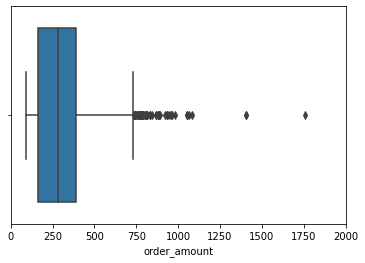

In [10]:
sn.boxplot(data_shop['order_amount'])
plt.xlim(0, 2000)

**Q.1.a.** Plotting the box plot again by chopping all the values above 2000 we found that there are still few outliers though we can now visualise the max min and quantile values of the data.

**Q.1.a.** We will explore certain ways to recalculate corrected AOV for the data


>


**Histogram Analysis**

[]

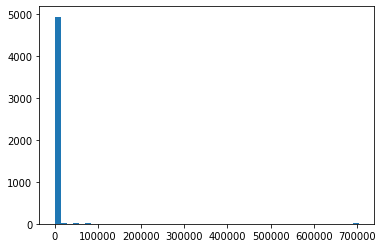

In [11]:
plt.hist(data_shop['order_amount'], bins=50)
plt.plot()

[]

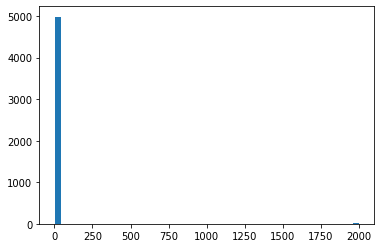

In [12]:
plt.hist(data_shop['total_items'], bins=50)
plt.plot()

**Q.1.a.** plotting 'total_items' and 'order_amount' clearly showed that data is highly skewed lets tune the data to get the accurate AOV for the data

In [13]:
tune_data = data_shop[data_shop['total_items']<20]

**Q.1.a.** From 'total_items' histogram we can see that outliers can be removed by chopping no. of items to 20

[]

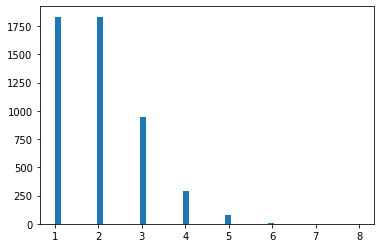

In [14]:
plt.hist(tune_data['total_items'], bins=50)
plt.plot()

[]

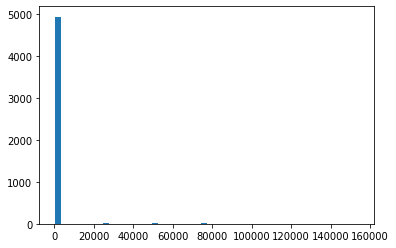

In [15]:
plt.hist(tune_data['order_amount'], bins=50)
plt.plot()

**Q.1.a.** 'total_items' histogram is seems to be pretty much normalised but 'order_amount' histogrm is still much skewed lets tune data a bit more to completly remove outliers

In [16]:
tune_data1 = tune_data[tune_data['order_amount']<3000]

**Q.1.a.** From 'order_amount' histogram we can see that outliers can be removed by chopping order amount value to 3000

[]

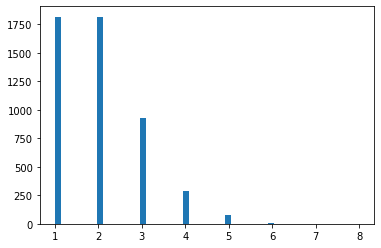

In [17]:
plt.hist(tune_data1['total_items'], bins=50)
plt.plot()

[]

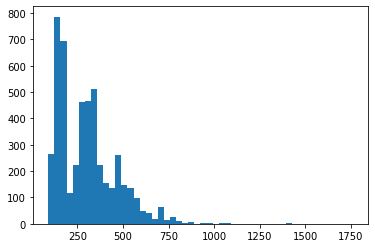

In [18]:
plt.hist(tune_data1['order_amount'], bins=50)
plt.plot()

**Q.1.a.** Much better for both the histograms we can see that the data is much normalised compared to their initial counterparts

In [19]:
tune_data1.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


**Q.1.a.** We can see that the 'mean' row of 'order_amount' column is giving value as **302.58** which is pretty much camparable. Hence this can be one method to tune data using histograms and calculating **Average Order Value**

**Q.1.a.**  **Box Plot Analysis**

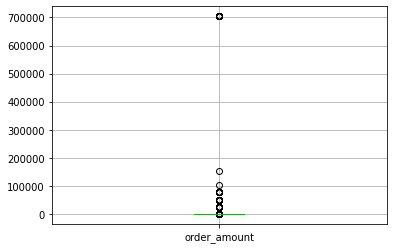

In [20]:
data_shop.boxplot('order_amount')

**Q.1.a.** Plotting the box plot of orginal 'order_amount' data can be seen having ouliers with very high value

In [21]:
Int_Quart_range = data_shop['order_amount'].quantile(0.75) - data_shop['order_amount'].quantile(0.25)

**Q.1.a.** Calculating Inter Quartile Range to further find out maximum and minimum values using box plot equations

In [22]:
filter_data = data_shop[(data_shop['order_amount'] < data_shop['order_amount'].quantile(0.75)+Int_Quart_range*1.5) & (data_shop['order_amount'] > data_shop['order_amount'].quantile(0.25)-Int_Quart_range*1.5)]

**Q.1.a.** Filtering data by selecting 'order_amount' values in the range of (First Quartile - IQR*1.5) to (Third Quartile + IQR*1.5) that respectively gives minimum and maximum values for boxplot excluding outlier.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


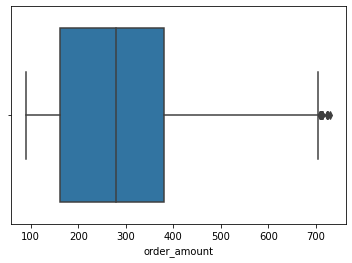

In [23]:
sn.boxplot(filter_data['order_amount'])

**Q.1.a.** Plotting the filtered data on a box plot gives commendable results though few oulier occurences can be seen. Lets use this data now to calculate AOV.

In [24]:
filter_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


**Q.1.a.** We can see that the 'mean' row of 'order_amount' column is giving value as **293.71** which is pretty much camparable. Hence this can be one method to tune data using **boxplot and calculating Average Order Value**

**Q.1.b. What metric would you report for this dataset?**

**Q.1.b.** Given the data with such high order outliers the first thing that comes to mind over Average Order Value is **Median Over Value(MOV)** or in simple terms median. Median being leaa dependent on the individual values of the distribution can minimise the effect of outliers to much higher level in comparison to mean.

Though it is always beneficial to consider AOV along considering business scenarios and analytics

**Q.1.c. What is its value?**

**Q.1.c.** Lets find out **median order value** for the data using **Original Data, Tune data for histogram analysis and Filtered data for boxplot analysis and compare**

**Q.1.c. MOV using original data**

In [25]:
data_shop.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**Q.1.c.** The '50%' row gives sencond quartile or the **Median order value** hence looking in the 'order_amount' column we found it as **284**

**Q.1.c. MOV using tuned data for histogram analysis**

In [26]:
tune_data1.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


**Q.1.c.** The '50%' row gives sencond quartile or the **Median order value** hence looking in the 'order_amount' column we found it as **284**

**Q.1.c. MOV using filtered data for boxplot analysis**

In [27]:
filter_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


**Q.1.c.** The '50%' row gives sencond quartile or the **Median order value** hence looking in the 'order_amount' column we found it as **280**

**Q.1.c. We found that for all the three data MEDIAN ORDER VALUE remains almost same averaging to 282 which is very near to AVERAGE ORDER VALUE found after analysis averaging to 298.15 and hence for data with outliers MEDIAN ORDER VALUE matrix is a perfect choice.**

**Q.2. For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**

**Q.2.a. How many orders were shipped by Speedy Express in total?**

Speedy express shipped 54 orders.

Query is having following logic:

Because number of orders are to be found orders table is queried along with inner join on shippers table on shipperID as common linkage as only orders delivered by Speedy Express needed to be found

In [ ]:
SELECT COUNT(*) AS speedy_orders
FROM Orders JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';

**Q.2.b. What is the last name of the employee with the most orders?**

Last name of the employee is Peacock with 40 orders.

Query is having following logic:

Last name of the employee is to be found hance querying on employee table but employee should have maximum no. of orders hence joining orders on employeeID linkage further grouped on last name and ordered in descending order.

In [ ]:
SELECT Employees.LastName, COUNT(*) AS order_count
FROM Employees JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID
GROUP BY Employees.LastName
ORDER BY order_count DESC
LIMIT 1;

**Q.2.c. What product was ordered the most by customers in Germany?**

In Germany Boston Crab Meat is order maximum 160 number of times.

Query is having following logic:

Product name is to be found hence querying products joining orderdetails on common linkage productID to sum total count of orders further joining orders on common linkage of orderID so that we can get customerID in the combine table to finally join customers on common linkage of cusomerID. Eventually conditioning country as germany data is grouped by product name and ordered in descending order.

In [ ]:
SELECT Products.ProductID, Products.productName, SUM(OrderDetails.Quantity) AS total_count
FROM Products JOIN OrderDetails ON OrderDetails.productID = Products.productID
JOIN Orders ON Orders.OrderID = OrderDetails.orderID
JOIN Customers ON Customers.CustomerID = Orders.CustomerID
WHERE Customers.Country = 'Germany'
GROUP BY Products.productName
ORDER BY total_count DESC
LIMIT 1;